## COMP 6934 Winter 2025 In class Work 3

Using matplotlib with Pandas.

The dataset is the same as problem set 2, taken from <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023>

But I've improved the data set by removing the strange degree symbols in the column names. Get the improved data set weather.zip

If the numpy library is not aleady installed, you may need to install it.

First, I grab the data from a csv format file into the familiar list-of-dictionaries fromat using a method from the standard csv python library:

In [1]:
import pandas as pd
import numpy as np

# read the csv data into a dataframe
df = pd.read_csv('Data/NL_weather.csv')

C:\Users\Mas85\AppData\Local\Temp\ipykernel_8388\4183044082.py:5: DtypeWarning: Columns (3,20,22,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/NL_weather.csv')


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99657 entries, 0 to 99656
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              99657 non-null  float64
 1   Latitude (y)               99657 non-null  float64
 2   Station Name               99657 non-null  object 
 3   Climate ID                 99657 non-null  object 
 4   Date/Time                  99657 non-null  object 
 5   Year                       99657 non-null  int64  
 6   Month                      99657 non-null  int64  
 7   Day                        99657 non-null  int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (C)               89860 non-null  float64
 10  Max Temp Flag              6292 non-null   object 
 11  Min Temp (C)               89834 non-null  float64
 12  Min Temp Flag              6307 non-null   object 
 13  Mean Temp (C)              89733 non-null  flo

That's too many data points for a standard plot. So I'll reduce the list to observations taken at the St. John's Airport in Jan of 2020.

In [3]:
j2020df = df[df['Station Name'].str.contains("ST. JOHN'S INTL") & (df['Year'] == 2020)
                    & (df['Month'] == 1)]

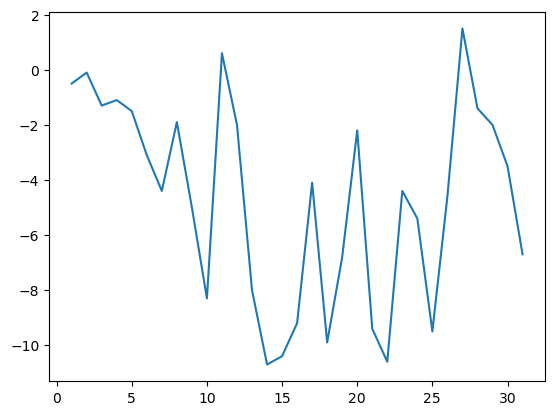

In [4]:
import matplotlib.pyplot as plt

plt.plot('Day','Mean Temp (C)', data=j2020df)
plt.show()

### Problem Set 3

Reproduce the remaining plots from problem set 2 using the Pandas Dataframe instead of list-of-dictionaries python data structure.

Note that the blanks in the input file are turned into NaN values by Pandas. 

#### Problem 3

* drop the data points that do not have a mean daily temperature reported
* select the data points for the first day of each month for the period of three years from 2020 to 2023 
    * plot the daily mean temperatures data points using matplotlib
* add a series/column to the data frame with the string 'red' if the temperature is above zero and the string 'blue' if the mean temperature is below zero for each data point
    * add circles for the data points on the previous plot
    * color the circles red or blue depending on the temperature
    * hint: add the keyword parameter `c='colorColumnName'` to matplotlib plot method to color the data points.

In [5]:
df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-22,2022,7,22,NaN,NaN,...,NaN,NaN,NaN,M,NaN,NaN,NaN,M,NaN,M
1,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-23,2022,7,23,NaN,19.9,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,41.0,NaN
2,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-24,2022,7,24,NaN,17.8,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,47.0,NaN
3,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-25,2022,7,25,NaN,18.7,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,53.0,NaN
4,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-26,2022,7,26,NaN,18.4,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,58.0,NaN


In [6]:
# Dropping rows with missing values in the "Mean Temp (C)" column
df_cleaned = df.dropna(subset=["Mean Temp (C)"])

# Display the cleaned DataFrame
print(df_cleaned)


       Longitude (x)  Latitude (y)    Station Name Climate ID   Date/Time  \
1             -53.99         47.29  ARGENTIA (AUT)    8400104  2022-07-23   
2             -53.99         47.29  ARGENTIA (AUT)    8400104  2022-07-24   
3             -53.99         47.29  ARGENTIA (AUT)    8400104  2022-07-25   
4             -53.99         47.29  ARGENTIA (AUT)    8400104  2022-07-26   
5             -53.99         47.29  ARGENTIA (AUT)    8400104  2022-07-27   
...              ...           ...             ...        ...         ...   
99652         -66.86         52.92        WABUSH A    8504177  2023-12-27   
99653         -66.86         52.92        WABUSH A    8504177  2023-12-28   
99654         -66.86         52.92        WABUSH A    8504177  2023-12-29   
99655         -66.86         52.92        WABUSH A    8504177  2023-12-30   
99656         -66.86         52.92        WABUSH A    8504177  2023-12-31   

       Year  Month  Day  Data Quality  Max Temp (C)  ... Total Snow (cm)  \

In [7]:
fl_date = pd.date_range(start='1/1/2020', end='12/1/2023', freq='MS')
print(fl_date)

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', freq='MS')


In [8]:
df.keys()

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (C)',
       'Max Temp Flag', 'Min Temp (C)', 'Min Temp Flag', 'Mean Temp (C)',
       'Mean Temp Flag', 'Heat Deg Days (C)', 'Heat Deg Days Flag',
       'Cool Deg Days (C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

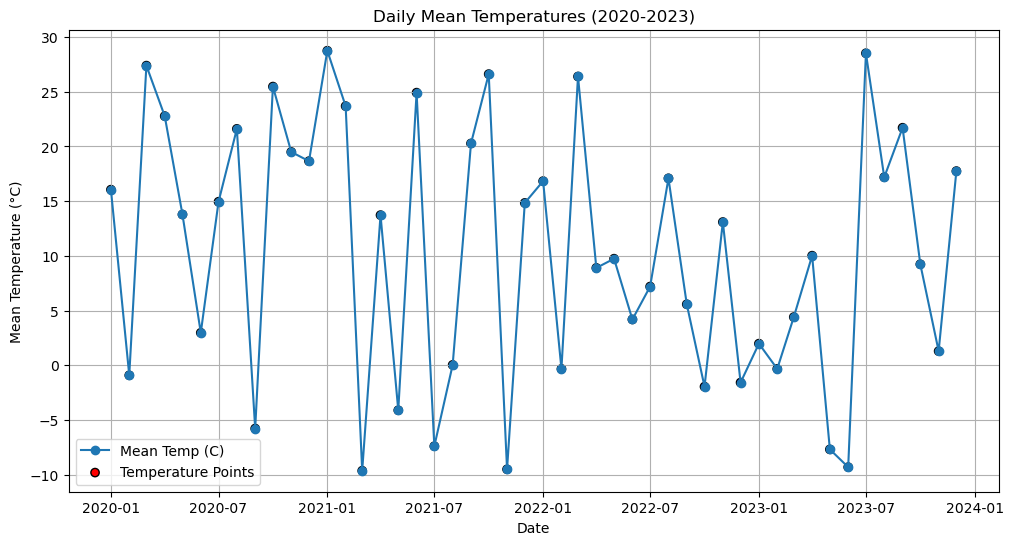

In [11]:
# Generate a sample DataFrame for demonstration
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
mean_temps = np.random.uniform(-10, 30, size=len(dates))  # Random temperatures between -10 and 30
data = {'Date': dates, 'Mean Temp (C)': mean_temps}
df = pd.DataFrame(data)

# Step 1: Drop rows where 'Mean Temp (C)' is missing
df_cleaned = df.dropna(subset=['Mean Temp (C)'])

# Step 2: Filter data for the first day of each month from 2020 to 2023
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])  # Ensure 'Date' is datetime
df_filtered = df_cleaned.set_index('Date').resample('MS').first().reset_index()

# Step 3: Add a color column based on the temperature
df_filtered['Color'] = np.where(df_filtered['Mean Temp (C)'] > 0, 'red', 'blue')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Date'], df_filtered['Mean Temp (C)'], marker='o', linestyle='-', label='Mean Temp (C)')
plt.scatter(
    df_filtered['Date'],
    df_filtered['Mean Temp (C)'],
    c=df_filtered['Color'],
    edgecolors='k',
    label='Temperature Points'
)
plt.title("Daily Mean Temperatures (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()
